In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np
'''
The Boston Housing Dataset

The Boston Housing Dataset is a derived from information collected by the U.S. Census Service concerning housing in the area of Boston MA. The following describes the dataset columns:

CRIM - per capita crime rate by town
ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
INDUS - proportion of non-retail business acres per town.
CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
NOX - nitric oxides concentration (parts per 10 million)
RM - average number of rooms per dwelling
AGE - proportion of owner-occupied units built prior to 1940
DIS - weighted distances to five Boston employment centres
RAD - index of accessibility to radial highways
TAX - full-value property-tax rate per $10,000
PTRATIO - pupil-teacher ratio by town
B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
LSTAT - % lower status of the population
MEDV - Median value of owner-occupied homes in $1000's
'''

"\nThe Boston Housing Dataset\n\nThe Boston Housing Dataset is a derived from information collected by the U.S. Census Service concerning housing in the area of Boston MA. The following describes the dataset columns:\n\nCRIM - per capita crime rate by town\nZN - proportion of residential land zoned for lots over 25,000 sq.ft.\nINDUS - proportion of non-retail business acres per town.\nCHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)\nNOX - nitric oxides concentration (parts per 10 million)\nRM - average number of rooms per dwelling\nAGE - proportion of owner-occupied units built prior to 1940\nDIS - weighted distances to five Boston employment centres\nRAD - index of accessibility to radial highways\nTAX - full-value property-tax rate per $10,000\nPTRATIO - pupil-teacher ratio by town\nB - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town\nLSTAT - % lower status of the population\nMEDV - Median value of owner-occupied homes in $1000's\n"

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [5]:
#reading the dataset
data=pd.read_csv("boston.csv")

In [9]:
#dataset 
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [6]:
#checking null values
data.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
MEDV       0
dtype: int64

In [7]:
x=data.drop('MEDV',axis=1)

In [8]:
y=data['MEDV']

In [9]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [10]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)

In [11]:
#model
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()

model.add(Dense(128,input_shape = (13,),activation = 'relu',name='dense_1'))
model.add(Dense(64,activation = 'relu',name = 'dense_2'))
model.add(Dense(1,activation='linear',name='dense_output'))

model.compile(optimizer = 'adam',loss='mse',metrics=['mae'])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 128)               1792      
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_output (Dense)        (None, 1)                 65        
                                                                 
Total params: 10,113
Trainable params: 10,113
Non-trainable params: 0
_________________________________________________________________


In [12]:
history=model.fit(x_train,y_train,epochs=50,batch_size=32,validation_split=0.2)

Epoch 1/50
11/11 [==============================] - 3s 56ms/step - loss: 563.8854 - mae: 22.0242 - val_loss: 507.9347 - val_mae: 20.5704
Epoch 2/50
11/11 [==============================] - 0s 7ms/step - loss: 499.0536 - mae: 20.5394 - val_loss: 440.8920 - val_mae: 19.0148
Epoch 3/50
11/11 [==============================] - 0s 10ms/step - loss: 420.2083 - mae: 18.6241 - val_loss: 354.7427 - val_mae: 16.9033
Epoch 4/50
11/11 [==============================] - 0s 11ms/step - loss: 319.1486 - mae: 15.8857 - val_loss: 250.1375 - val_mae: 13.9542
Epoch 5/50
11/11 [==============================] - 0s 19ms/step - loss: 209.5889 - mae: 12.3335 - val_loss: 147.3681 - val_mae: 10.5182
Epoch 6/50
11/11 [==============================] - 0s 17ms/step - loss: 118.5874 - mae: 8.7603 - val_loss: 86.8210 - val_mae: 7.5146
Epoch 7/50
11/11 [==============================] - 0s 15ms/step - loss: 75.1346 - mae: 6.7799 - val_loss: 65.9300 - val_mae: 5.9939
Epoch 8/50
11/11 [==============================]

In [13]:
mse,mae=model.evaluate(x_test,y_test)
print("mse:",mse)
print("mae:",mae)

4/4 [==============================] - 0s 3ms/step - loss: 11.1723 - mae: 2.6671
mse: 11.172266006469727
mae: 2.667060375213623


In [14]:
y_pred = model.predict(x_test[:])

4/4 [==============================] - 0s 4ms/step


In [15]:
p=[]
for i in y_pred:
    p.append(list(i)[0])

In [16]:
d = pd.DataFrame({'actual':y_test,'predicted':p})
d

,actual,predicted
307,28.2,29.459948
343,23.9,22.590395
47,16.6,21.010347
67,22.0,23.895338
362,20.8,21.190619
...,...,...
92,22.9,24.142698
224,44.8,43.452026
110,21.7,20.922251
426,10.2,14.378782


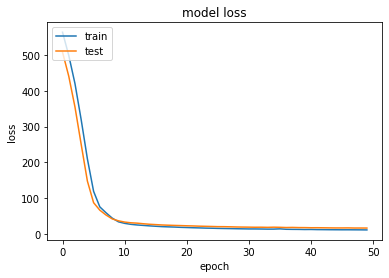

In [17]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

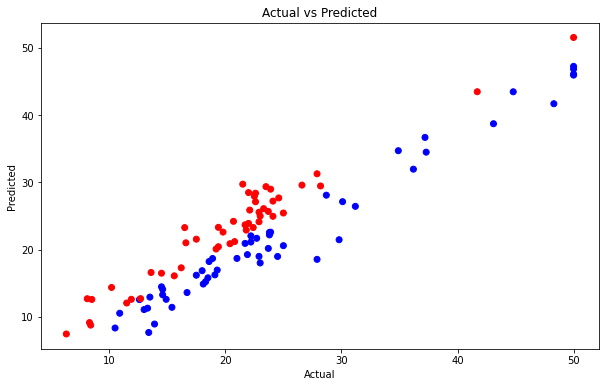

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming y_test contains the actual values and p contains the predicted values
d = pd.DataFrame({'Actual': y_test, 'Predicted': p})

# Plot the graph
plt.figure(figsize=(10, 6))
plt.scatter(d['Actual'], d['Predicted'], c=['blue' if a > p else 'red' for a, p in zip(d['Actual'], d['Predicted'])])
plt.title('Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()
